# What's Cooking?

In [109]:
# 데이터 분석
import pandas as pd
import numpy as np
import random as rnd

from collections import Counter

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer

## 데이터 로딩 및 확인

In [110]:
# 데이터 로딩
train_df = pd.read_json('./data/train.json')
test_df = pd.read_json('./data/test.json')

In [111]:
print(train_df.columns.values)

['id' 'cuisine' 'ingredients']


In [112]:
# preview the data
train_df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [113]:
test_df.head(10)

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
5,38527,"[baking powder, all-purpose flour, peach slice..."
6,19666,"[grape juice, orange, white zinfandel]"
7,41217,"[ground ginger, white pepper, green onions, or..."
8,28753,"[diced onions, taco seasoning mix, all-purpose..."
9,22659,"[eggs, cherries, dates, dark muscovado sugar, ..."


In [74]:
train_df.tail()


,id,cuisine,ingredients
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."
39773,2362,mexican,"[green chile, jalapeno chilies, onions, ground..."


In [78]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 621.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9944 non-null   int64 
 1   ingredients  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 116.6+ KB


## Missing Value 처리

In [79]:
# check missing values in train dataset
train_df.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [80]:
test_df.isnull().sum()

id             0
ingredients    0
dtype: int64

## 데이터 시각화와 전처리

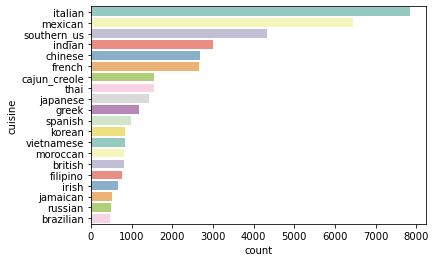

In [81]:
# 데이터 중에서 어떤 요리(지역)이 많은 지 그래프를 그려 확인
sns.countplot(y='cuisine',data=train_df, order = train_df['cuisine'].value_counts().index, palette='Set3')
plt.show()

In [82]:
# 어떤 재료 많이 사용됐는 지 그래프를 그려 확인
top = Counter([item for sublist in train_df.ingredients for item in sublist]).most_common(n)
temp= pd.DataFrame(top)
temp.columns = ['ingredient','total_count']
temp = temp.head(20)
temp.head()

,ingredient,total_count
0,salt,18049
1,onions,7972
2,olive oil,7972
3,water,7457
4,garlic,7380


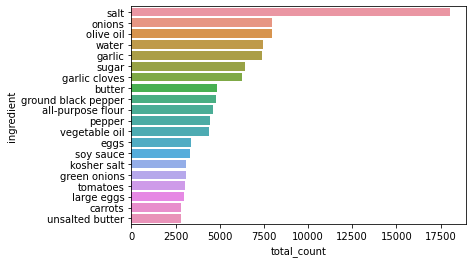

In [83]:
sns.barplot(x='total_count', y='ingredient', data=temp)
plt.show()

In [91]:
# train data 재료 이름 사이 공백 제거
ing = train_df['ingredients']
ing_new = list()
ing_new_2 = list()

for ing_i in ing:
    a_list = list()
    for i in range(len(ing_i)):
        a_list.append(ing_i[i].replace(" ",""))
    ing_new.append(" ".join(a_list))
    ing_new_2.extend(a_list)

In [98]:
# test data 재료 이름 사이 공백 제거
ing_test = test_df['ingredients']
ingt_new_test = list()

for ing_i in ing_test:
    a_list = list()
    for i in range(len(ing_i)):
        a_list.append(ing_i[i].replace(" ",""))
    ingt_new_test.append(" ".join(a_list))

# Machine Learning 기법을 활용한 생존자 예측
## 활용 모델

Logistic Regression

In [103]:
# Counter Vector : 텍스트를 숫자로 변형해줌
count = CountVectorizer()
bag = count.fit_transform(ing_new)

count_test = CountVectorizer(vocabulary = count.vocabulary_)
bagt = count_test.fit_transform(ingt_new)

In [104]:
X_train = bag
Y_train = train_df['cuisine']
X_test = bagt

## Logistic Regression

In [95]:
# Logistic Regression training
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

c:\users\chaewon\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [105]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

88.78

In [107]:
# Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test)
Y_pred_logreg

array(['british', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], dtype=object)

## 최종 결과 저장

In [108]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "cuisine": Y_pred_logreg
})
submission.to_csv('./data/submission.csv', index=False)